In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import tree

In [2]:
df = pd.read_csv('../Datasets/Crop_recommendation.csv')

In [3]:
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [4]:
df.shape

(2200, 8)

In [5]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [6]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [7]:
df['label'].unique().shape

(22,)

In [8]:
df['label'].value_counts()

kidneybeans    100
pomegranate    100
grapes         100
mothbeans      100
papaya         100
chickpea       100
mungbean       100
mango          100
maize          100
blackgram      100
pigeonpeas     100
lentil         100
muskmelon      100
rice           100
coconut        100
banana         100
jute           100
coffee         100
watermelon     100
apple          100
orange         100
cotton         100
Name: label, dtype: int64

In [9]:
continuous_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
continuous_features

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

In [10]:
catogorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
catogorical_features

['label']

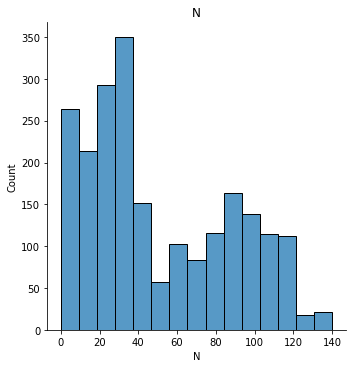

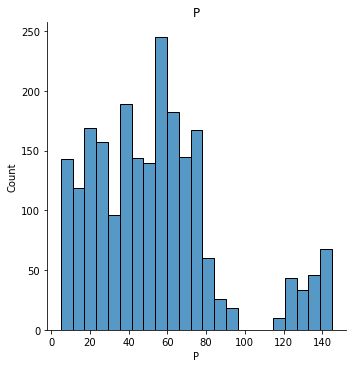

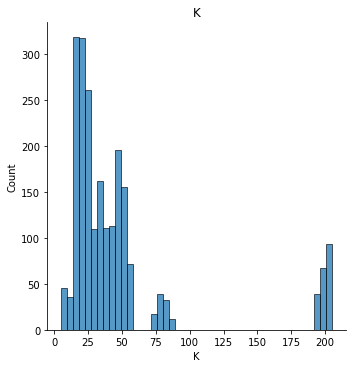

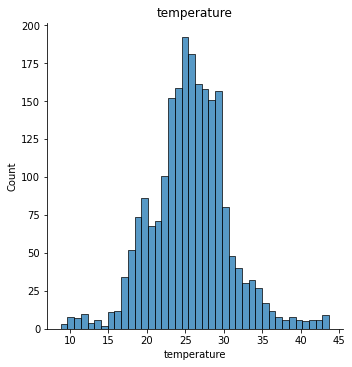

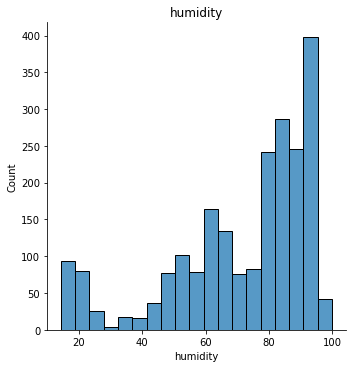

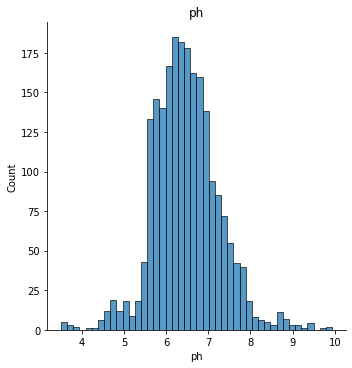

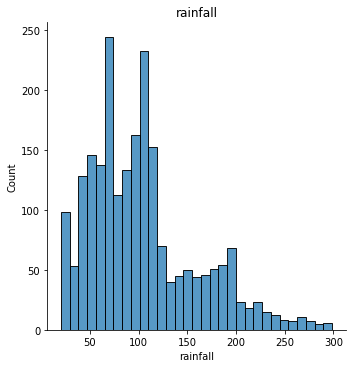

In [11]:
for feature in continuous_features:
    sns.displot(df[feature])
    plt.title(feature)
    plt.show()

<AxesSubplot:>

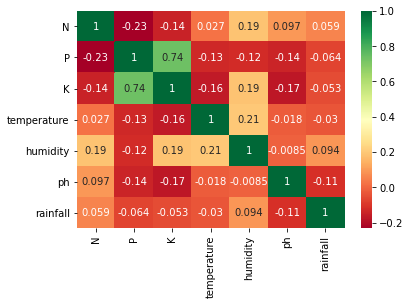

In [13]:
sns.heatmap(df.corr(),annot=True,cmap = "RdYlGn")

In [14]:
features = df.drop('label', axis = 'columns')
target = df['label']

In [15]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

### Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

C:\Users\Sudharsan Baskar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Hyper parameter tuning for Logistic regression

In [17]:
from sklearn.model_selection import cross_val_score
lr_score = cross_val_score(LogisticRegression(), Xtrain, Ytrain, cv=10)
lr_score.mean()

C:\Users\Sudharsan Baskar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sudharsan Baskar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

0.9579545454545455

### RandomForest 

In [18]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

### Decision Tree

#### Hyper parameter tuning for Decision tree

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
clf = GridSearchCV(DecisionTreeClassifier(), {'criterion':['gini', 'entropy']}, cv=10, return_train_score=False)
clf.fit(Xtrain, Ytrain)
clf.cv_results_

{'mean_fit_time': array([0.00807869, 0.01167314]),
 'std_fit_time': array([0.00053737, 0.00064151]),
 'mean_score_time': array([0.00119922, 0.00109458]),
 'std_score_time': array([0.000398 , 0.0002923]),
 'param_criterion': masked_array(data=['gini', 'entropy'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'criterion': 'gini'}, {'criterion': 'entropy'}],
 'split0_test_score': array([0.98295455, 0.97727273]),
 'split1_test_score': array([0.98863636, 0.99431818]),
 'split2_test_score': array([1.        , 0.96590909]),
 'split3_test_score': array([0.98295455, 0.98295455]),
 'split4_test_score': array([0.97727273, 0.98295455]),
 'split5_test_score': array([0.98863636, 0.98863636]),
 'split6_test_score': array([0.98295455, 0.97727273]),
 'split7_test_score': array([0.96590909, 0.97159091]),
 'split8_test_score': array([0.98295455, 0.98295455]),
 'split9_test_score': array([0.99431818, 0.99431818]),
 'mean_test_score': array([0.98465909,

In [20]:
dt_result_df = pd.DataFrame(clf.cv_results_)
dt_result_df[['param_criterion', 'mean_test_score']]

param_criterion  mean_test_score
0            gini         0.984659
1         entropy         0.981818

In [21]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)

print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

C:\Users\Sudharsan Baskar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### After seeing the Accuracies of various algorithms, Random Forest classifier performs very well

In [22]:
import pickle
filename = 'RandomForest.pkl'
RF_Model_pkl = open(filename, 'wb')
pickle.dump(RF, RF_Model_pkl)

In [23]:
data = np.array([[90, 42, 43, 20.879744, 82.002744, 6.502985, 202.935536]])
prediction = RF.predict(data)
print(prediction)

['rice']


In [24]:
data = np.array([[85, 58, 41, 21.770462, 80.319644, 7.038096, 226.655537]])
prediction = RF.predict(data)
print(prediction)

['rice']


### Thank You